## Dataset and EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Line Plots

In [33]:
df = pd.read_csv('../data/clarinete-6-timeline.csv', parse_dates=['Date'],
                 index_col='Date')
df.describe()

/var/folders/0l/p7lzlqxn44b036b_3ykx4tlr0000gn/T/ipykernel_7856/1204389760.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../data/clarinete-6-timeline.csv', parse_dates=['Date'],


,Timestamp,Bottom Hole Pressure,Tubing Pressure,Casing Pressure,Position,Line Pressure,Gas Meter Cumulative Total,Gas Meter Differential Pressure,Gas Meter Flow Rate,Gas Meter Static Pressure,Gas Meter Temperature,Gas Meter Today's Total,Gas Meter Yesterday's Total
count,4.389000e+03,2904.000000,4389.000000,4389.000000,4389.000000,4389.000000,4.385000e+03,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000
mean,1.680000e+12,1408.759335,789.789975,78.020549,50.305466,548.039152,3.319522e+06,319.078451,15252.151048,556.267924,92.763707,7564.869966,15145.836234
std,0.000000e+00,97.510200,93.059056,20.954967,5.801766,108.602200,1.327178e+05,87.166791,1787.222016,107.292801,3.109797,4476.485621,1410.169952
min,1.680000e+12,1207.210000,621.560000,29.770000,38.410000,431.600000,3.093396e+06,24.320000,5624.880000,439.340000,85.060000,28.650000,10647.210000
25%,1.680000e+12,1336.220000,740.270000,82.410000,45.470000,483.630000,3.203922e+06,287.920000,14398.420000,493.820000,90.370000,3706.640000,14366.820000
50%,1.680000e+12,1399.330000,776.020000,85.500000,51.500000,521.950000,3.317480e+06,318.650000,15904.230000,529.970000,92.870000,7453.550000,15687.980000
75%,1.680000e+12,1440.312500,840.700000,88.310000,52.420000,568.710000,3.432262e+06,401.450000,16346.690000,576.910000,94.580000,11301.100000,16137.390000
max,1.680000e+12,1878.530000,1051.880000,108.560000,80.150000,995.740000,3.556902e+06,470.180000,19791.370000,999.680000,102.550000,16866.570000,16926.780000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4389 entries, 2023-04-01 00:07:00 to 2023-04-20 09:57:00
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp                        4389 non-null   float64
 1   Bottom Hole Pressure             2904 non-null   float64
 2   Tubing Pressure                  4389 non-null   float64
 3   Casing Pressure                  4389 non-null   float64
 4   Position                         4389 non-null   float64
 5   Line Pressure                    4389 non-null   float64
 6   Gas Meter Cumulative Total       4385 non-null   float64
 7   Gas Meter Differential Pressure  4389 non-null   float64
 8   Gas Meter Flow Rate              4389 non-null   float64
 9   Gas Meter Static Pressure        4389 non-null   float64
 10  Gas Meter Temperature            4389 non-null   float64
 11  Gas Meter Today's Total          4389 non-null

In [35]:
print(df.isnull().sum())

Timestamp                             0
Bottom Hole Pressure               1485
Tubing Pressure                       0
Casing Pressure                       0
Position                              0
Line Pressure                         0
Gas Meter Cumulative Total            4
Gas Meter Differential Pressure       0
Gas Meter Flow Rate                   0
Gas Meter Static Pressure             0
Gas Meter Temperature                 0
Gas Meter Today's Total               0
Gas Meter Yesterday's Total           0
dtype: int64


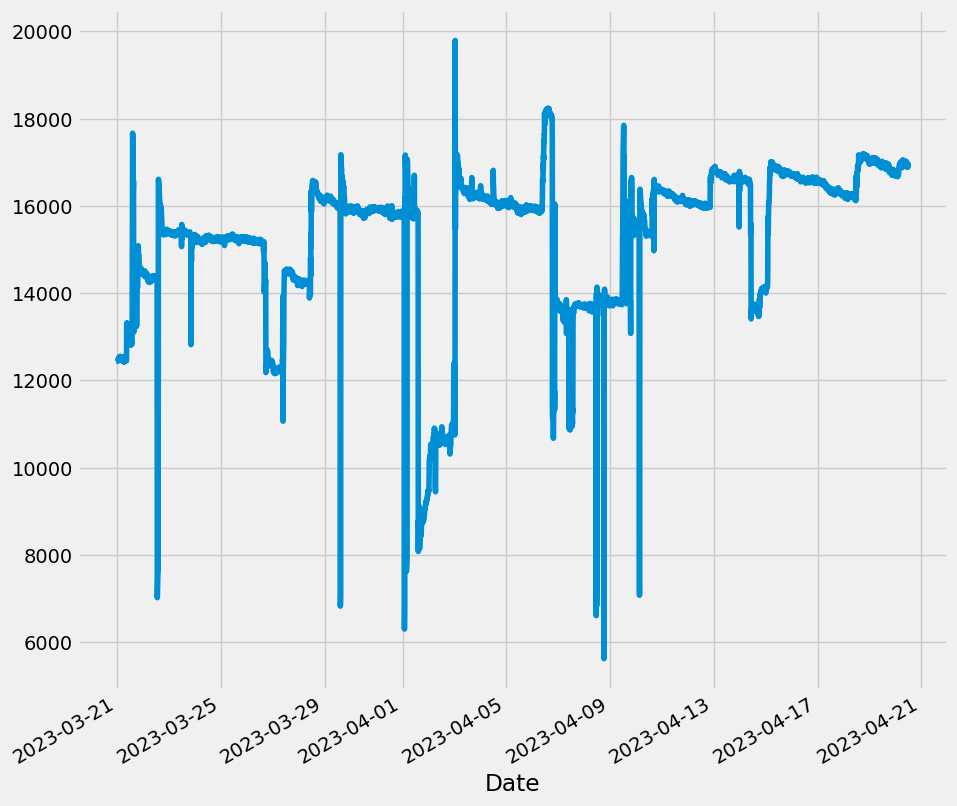

In [36]:
df_gas = df['Gas Meter Flow Rate','Position']
df_gas.plot(figsize=(10,10))
plt.show()

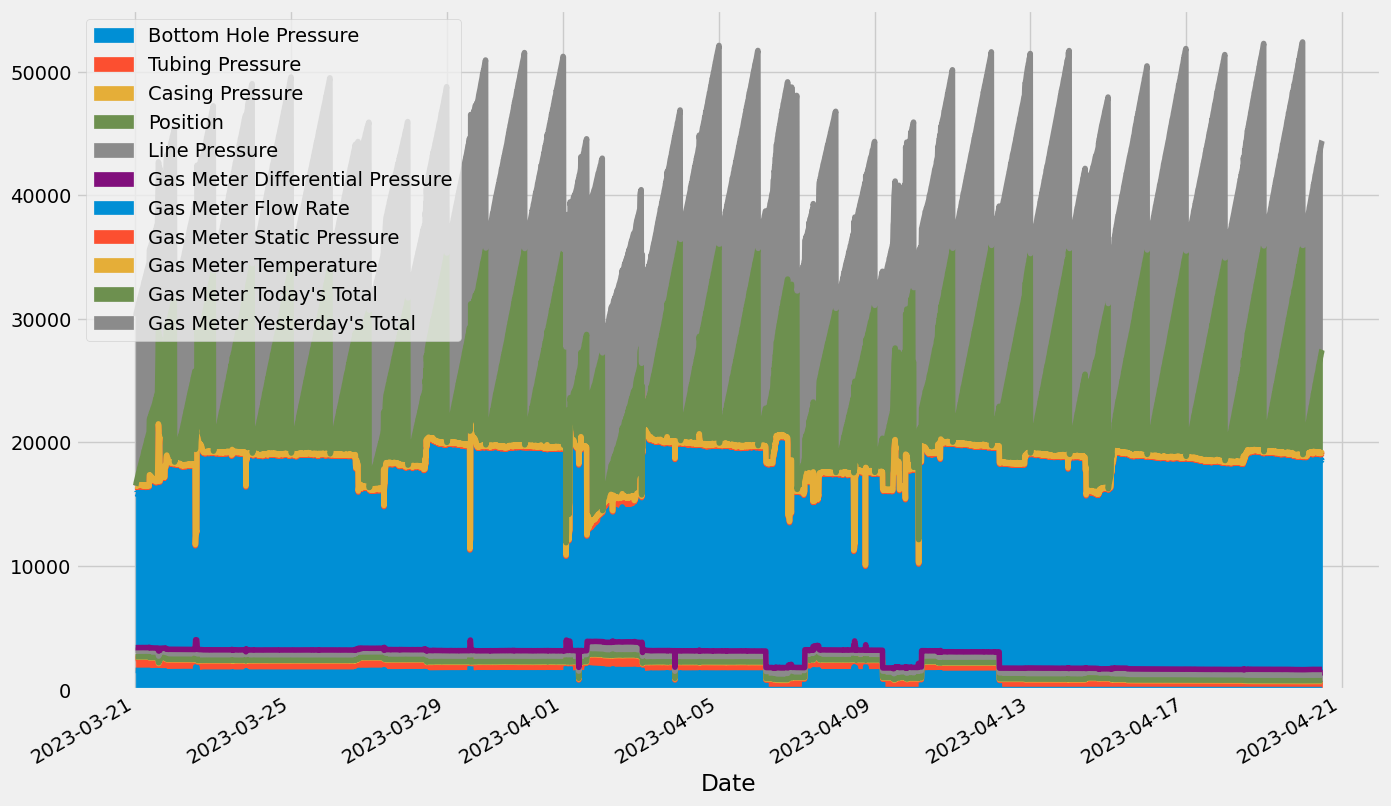

In [32]:
ax = df.plot.area(figsize=(15,10), fontsize=14)

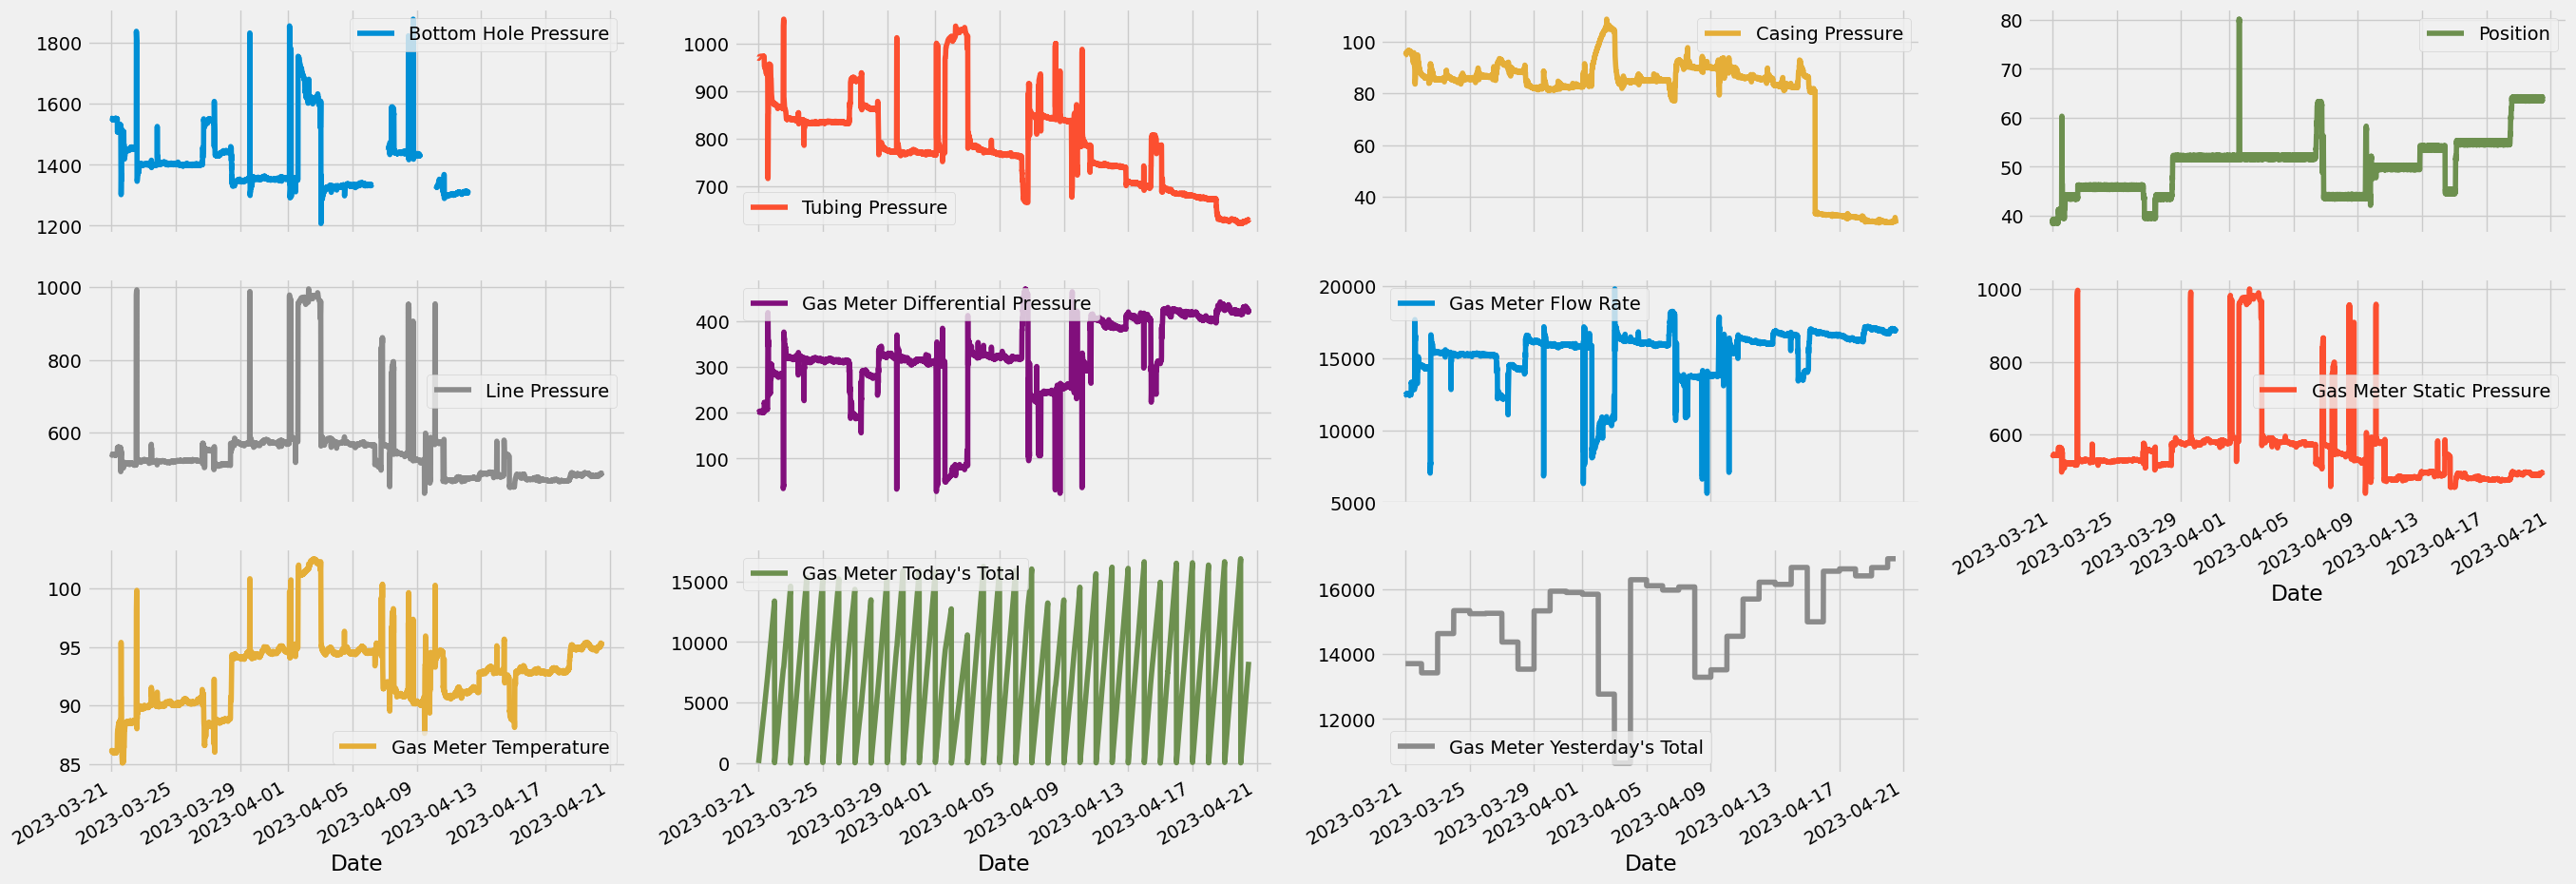

In [39]:
# Facet plots of the jobs dataset
df.drop(columns=['Timestamp','Gas Meter Cumulative Total'], axis=1, inplace=True)
df.plot(subplots=True, layout=(4, 4),
          figsize=(30, 16),
          sharex=True,
          sharey=False)
plt.show()

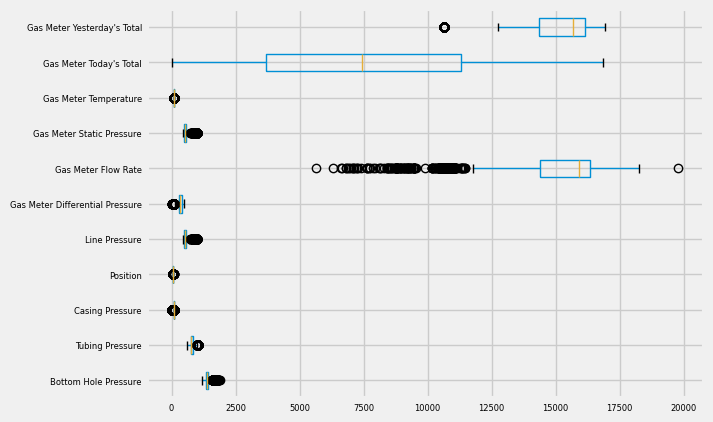

       Bottom Hole Pressure  Tubing Pressure  Casing Pressure     Position   
count           2904.000000      4389.000000      4389.000000  4389.000000  \
mean            1408.759335       789.789975        78.020549    50.305466   
std               97.510200        93.059056        20.954967     5.801766   
min             1207.210000       621.560000        29.770000    38.410000   
25%             1336.220000       740.270000        82.410000    45.470000   
50%             1399.330000       776.020000        85.500000    51.500000   
75%             1440.312500       840.700000        88.310000    52.420000   
max             1878.530000      1051.880000       108.560000    80.150000   

       Line Pressure  Gas Meter Differential Pressure  Gas Meter Flow Rate   
count    4389.000000                      4389.000000          4389.000000  \
mean      548.039152                       319.078451         15252.151048   
std       108.602200                        87.166791          

In [40]:
# Generate a boxplot
df.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(df.describe())

<Axes: >

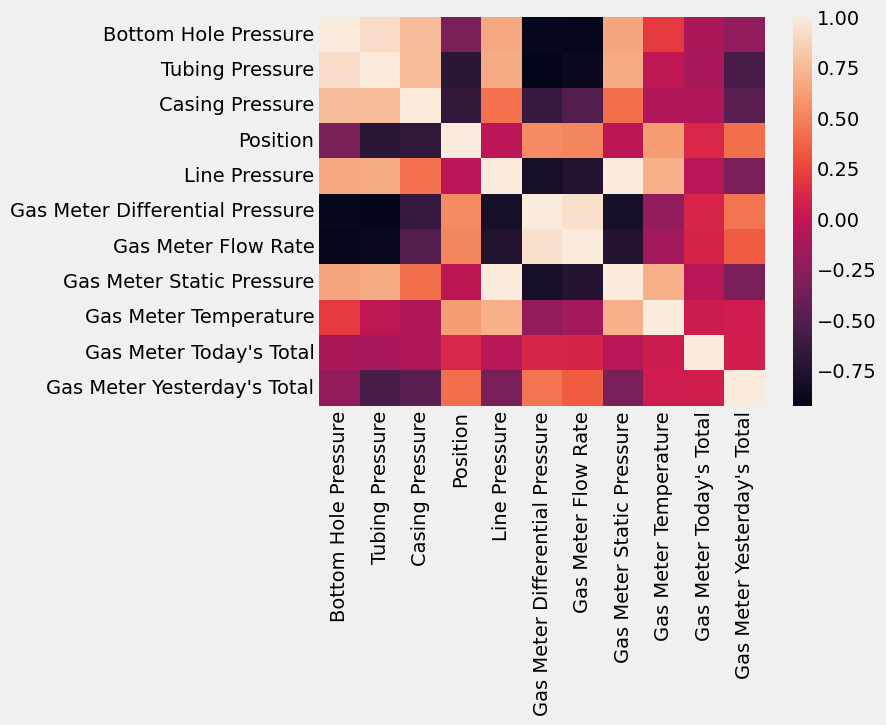

In [41]:
import seaborn as sns
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat)

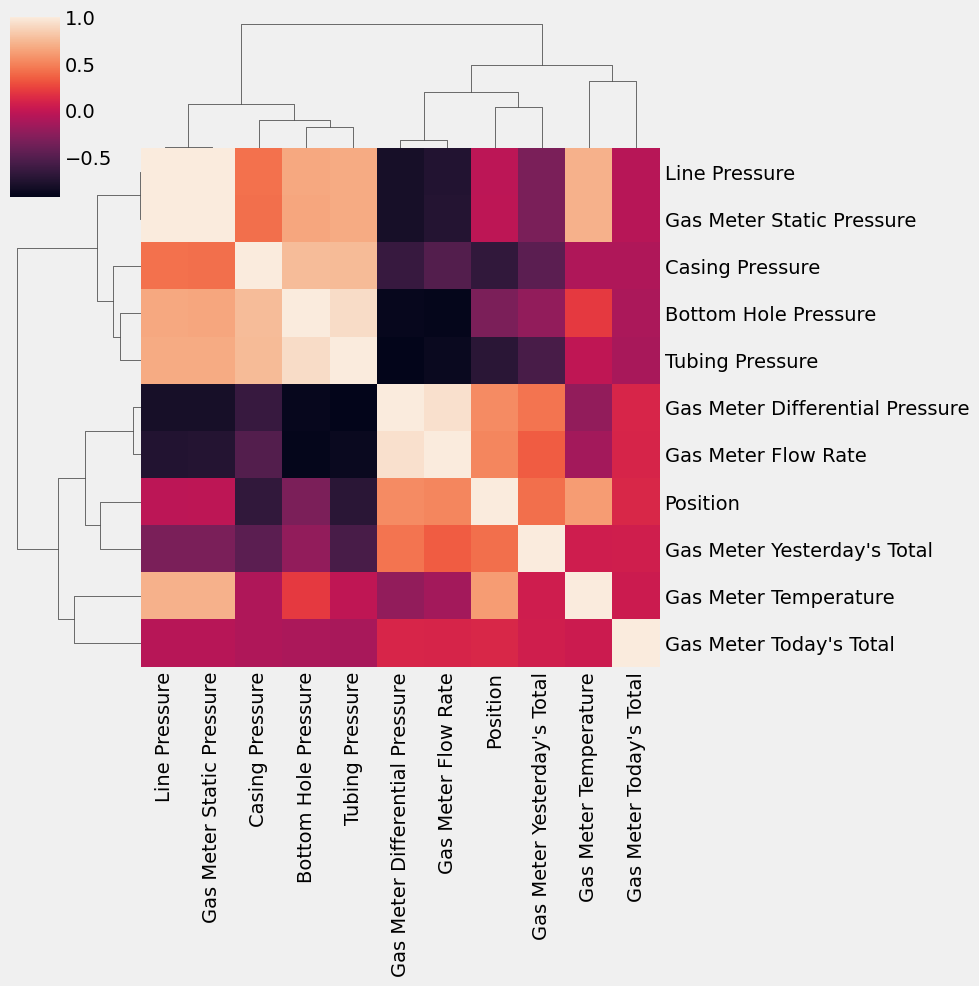

In [42]:
# Clustermap
sns.clustermap(corr_mat)